# Bonus Assignment: Data Manipulation Skills (15%)
This bonus is made up of several parts -- you may wish to do one part, or many, the choice is yours. Submission instructions will be provided at a later date.

__**Due December 10th**__

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 6.0)

## Part 1: (7.5%)
This question is straight forward. It may be time consuming, but you have all the skills you need based on the content in our course.

I want to know whether there is a relationship between voting patterns and subsequent covid-19 outbreaks in the United States, with the question being rooted in headlines about mask compliance in election lineups and political posturing on the importance of masks.

But we need to reduce this problem a bit, and I'm missing a critical piece of the data in order to answer the question myself. To this end, I have assigned you three different states to get election results data on. For each state you have been assigned you must get all of the **county** level **presidential voting** percentages for the top two candidates (Biden and Trump). I think the most reasonable way to get this is from the Washington Post election website -- here's an example for Pennsylvania, using the data at https://www.washingtonpost.com/elections/election-results/pennsylvania-2020/. In this example I've put my mouse over the county of Warren and a little popup came up with the candidate names, number of votes, and overall percentage of vote for the county.

![](wapo.png)

So as a first step of this assignment you need to get the data behind all of the counties in the three states you were assigned and store this in a csv file called `results.csv`. This file should strictly adhere to the following format example and have all of your data in it:

```
county,state,trump_votes,trump_pct,biden_votes,biden_pct
Warren,Pennsylvania,14237,68.9,6066,29.4
```

Also, I don't care how you get this county data! I think scraping is likely not the fastest, but it might be -- that's up to you to explore and figure out. To determine which three states you have been assigned enter your University of Michigan email address in the cell below.

In [3]:
um_email="brooksch@umich.edu"

import random, hashlib
random.seed(int(hashlib.sha256(um_email.encode()).hexdigest()[-8:]))
state_names = ["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", "Connecticut", 
               "Delaware", "Florida", "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", 
               "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", 
               "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", 
               "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", 
               "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", 
               "Tennessee", "Texas", "Utah", "Virginia", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]
print("The states assigned to {} are {}".format(um_email,", ".join([state_names[random.randint(0,50)] for x in range(0,3)])))

The states assigned to brooksch@umich.edu are Georgia, Oklahoma, Kentucky


Once you have the election data for these three states, you need to get covid case data. Once again, a news paper seems the best place to get this data, this time from the New York Times. However, they've made their data available on github for free! Here's a link to their repository https://github.com/nytimes/covid-19-data

From this you can download the county level data. This data is provided in a csv in the format shown below:
```
date,county,state,fips,cases,deaths
2020-03-25,Warren,Pennsylvania,42123,1,0
```
The FIPS number is just a unique identifier for a US state/territory, so you can ignore it for this question. In the example I've provided you can see that on March 25th in this county there was one new case, and no new deaths.

The question I want you to answer is **With the county level data you have, is there a correlation between the change in cases from the week before the election (defined as October 27th through November 2nd inclusive) to the one week period 2 weeks after the election (defined as November 18 through November 25th inclusive)?** I would like to see your analysis as a Welch's t-test which tests the null hypothesis that the change in cases for counties which voted for Biden is the same as the change in cases for counties which voted for Trump. Thus to answer this question I would expect to see (a) you indicating whether there is a difference between the red and blue counties in change of cases, and (b) whether that difference indicated red counties or blue counties were seeing a higher rate of change.

(Remember, a t-test requires equal variances in your comparisons, and thus usually we have equal population sizes. But you might have more of one kind of result in your data, so the Welch's t-test modifies this so work better for unequal variances. In python this means you'll be using the `scipy.stats.ttest_ind` function and setting the parameter `equal_var=False`. Here's a link: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

**Note: You absolutely need to account for the number of people who would have voted! For instance, if one county was twice the size of another, we would expect that it would have twice as many casess. To do this, you should not consider cases by absolutely value, but by a ratio compared to the number of people voting in that county.**

## Part 2: (5%)
This question is hard. It requires you to learn some new things, but I do a demonstration here and there are plenty of resources on the web to go deeper.

In the previous part of this assignment you calculated weekly averages of cases to determine if there was an increase or decrease. But it is possible to build a model to *predict* what cases might be. For instance, if you saw cases rising regularly, you would expect to see higher cases, while if you saw them declining, you would expect to see lower cases. Imagine data from two mythical counties, Wolverineville, MI and Spartanium, MI. Now imagine that these counties are the same in many ways, but have different case counts as given below.

In [4]:
wolverineville_daily=[13,12,10,10,7,7,6]
spartanium_daily=[6,7,8,9,10,11,13]

We can see that these two counties look pretty similar with the average and standard deviation of daily cases:

In [5]:
import numpy as np
print("Wolverineville mean {} and stddev {}".format(np.average(wolverineville_daily), np.std(wolverineville_daily)))
print("Spartanium mean {} and stddev {}".format(np.average(spartanium_daily), np.std(spartanium_daily)))

Wolverineville mean 9.285714285714286 and stddev 2.4907993963089563
Spartanium mean 9.142857142857142 and stddev 2.2314999074019015


But this is misleading, and it reminds me a bit of the famous phenomenal of [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)! If we plot the two series against time, we can see that one of these two counties clearly has declining cases, while the other has a rise in cases.

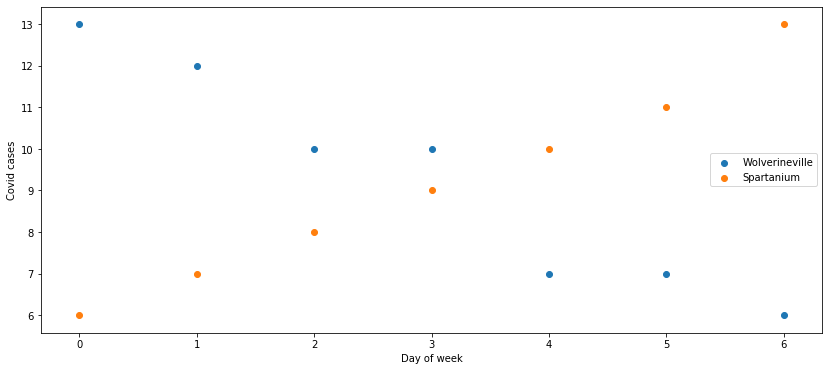

In [6]:
import pandas as pd
df_wolverineville_daily=pd.DataFrame(wolverineville_daily,columns=["Wolverineville"])
df_spartanium_daily=pd.DataFrame(spartanium_daily,columns=["Spartanium"])

plt.scatter(df_wolverineville_daily.index,df_wolverineville_daily)
plt.scatter(df_spartanium_daily.index,df_spartanium_daily)

plt.ylabel("Covid cases")
plt.xlabel("Day of week")
plt.legend(["Wolverineville","Spartanium"]);

So, in this question, I want you to develop a simple predictive model for each county with the

In [7]:
from sklearn.linear_model import LinearRegression

# This is our training data, that is the day offset since the beginning of our record. It 
# needs to be set as a two dimensional array where one dimension is of length one, since we 
# only have one feature, which is the day number.
X=df_wolverineville_daily.index.to_numpy().reshape(-1, 1)

# These are our outcomes, the thing we want to predict. In our case, this is our number of
# covid cases
y=df_wolverineville_daily["Wolverineville"].to_numpy()

# Now we fit the model. Underneath this is done with OLS regression by sklearn for us
reg = LinearRegression().fit(X, y)

# There are a number of things we can do diagnostically once we have fit the model, such as
# printing out the R squared value. This is a measure of how well the model fits out data,
# and as it gets closer to 1 it means the fit is perfect, where at 0 it means the model is
# poor
reg.score(X, y)

0.9506578947368421

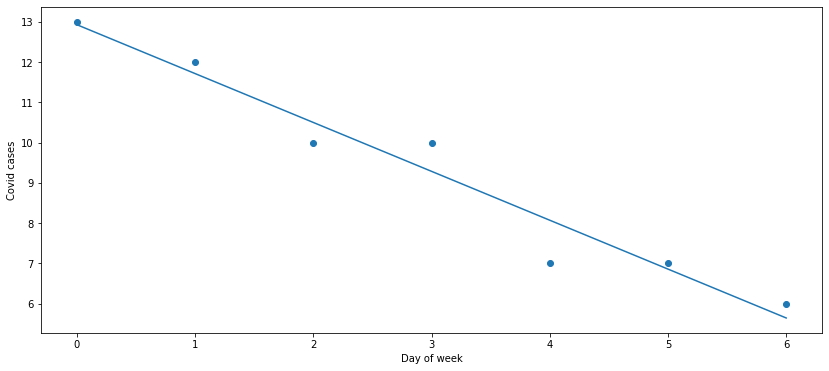

In [8]:
# Most useful though, is that we can plot this predictor for Wolverineville versus the
# actual data to see how well it fits
plt.scatter(df_wolverineville_daily.index,df_wolverineville_daily)
plt.plot(reg.predict(df_wolverineville_daily.index.to_numpy().reshape(-1, 1)))

plt.ylabel("Covid cases")
plt.xlabel("Day of week");

That's not a bad predictive model! Ok, but how does this help us understand what we expect future case loads to look like? Well, now we have a model we can ask it to predict some new data for us. In this example I want to predict out the nex 7 days of data and plot them as a separate series.

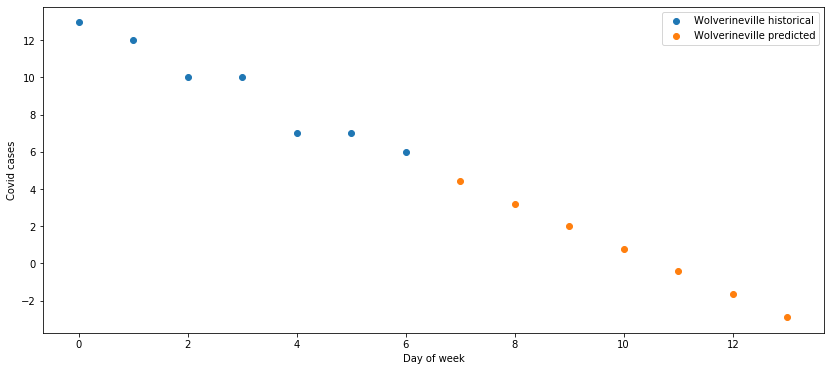

In [9]:
days_to_predict=[i for i in range(7,14)]
wolverineville_future=reg.predict(np.array(days_to_predict).reshape(-1, 1))

# plot our historical data
plt.scatter(df_wolverineville_daily.index,df_wolverineville_daily)

# plot our predicted future data
plt.scatter(days_to_predict, wolverineville_future)

plt.ylabel("Covid cases")
plt.xlabel("Day of week")
plt.legend(["Wolverineville historical","Wolverineville predicted"]);

Well, you can see that this isn't perfect, since the model predicted *negative cases* in the far off future. But that's an edge case I don't think we'll need to worry about here.

On to your task: I want you to build county-based linear models using historical cases (October 27th through November 2nd inclusive) leading up to the election. Then for the target period after the election (defined as November 18 through November 25th inclusive) I want you to generate predictive outcomes per county, and report on whether the mean of the expected values (the ones you are predicting) different from the mean of the observed values (what's actually in the NYT dataset), and whether the differences you see change depending upon whether Biden or Trump won in that county. Again, you need to account for the number of people who would have voted! For instance, if one county was twice the size of another, we would expect that it would have twice as many cases, so you're actually predicting normalized case counts.

The outputs I want to see for this analysis are a bit more detailed:
1. The difference between the actual and predicted values overall. Since you are predicting a week of data, I would like to see this as the difference between the mean of the predicted week and the actual data, and I want to see this averaged over all counties. Give me a standard deviation too please.
2. A Welch's t-test looking at whether the difference between the county predictions and observed values differ based on whether Biden or Trump carried the state.
3. An interpretation of what this all means, given the general question, and caveats which come to mind with this data.


## Part 3 (2.5%)
This part is very hard and I expect few will attempt it. Parts 1 and 2 must be completed before this part is attempted. It requires some independent learning.

In this part I want you to change your modeling from a linear regression (which fits a straight line) to a polynomial support vector machine (which fits a curve). This may sound daunting, but the general format of the svm model (we use `sklearn.svm.SVR` for regression tasks, see https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR) is the same, you first `fit()` the model on the data you observe and then you `predict()` on new instances of data.

I'd then like you to build two models **per state** for the three states you have, using the training data for the first two weeks of November, and predict the outcomes of **cases** and **deaths** for the last two weeks of November.

Was your model more accurate for one of the states? Compare the quality of your three models (however you see fit).